# <span style="color:#57a989">Análisis de temperaturas en superconductores</span>\

**Materia:** Introducción a la Ciencia de Datos

**Elaborado por:** Eber David Gaytán Medina.

**Fuente:** https://www.kaggle.com/datasets/tunguz/superconductivty-data-data-set/data

**Preguntas de investigación:** ¿Qué relación existe entre la composición de los elementos y la superconductividad a altas temperaturas?


## <span style="color:#57a989">Indice</span>

[1. Limpieza de datos](#1.-Limpieza-de-Datos)

[2. Análisis exploratorio de los datos](#2.-Análisis-Exploratorio-de-los-Datos)

[3. Extracción y selección de características](#3.-Extracción-y-selección-de-características)

[4. Entrenamiento del modelo DNN](#4.-Entrenamiento-del-modelo-DNN)

[5. Evaluación del modelo](#5.-Evaluación-del-modelo)

[6. Conclusiones](#6.-Conclusiones)

In [1]:
# Importar librerias básicas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Eber, recuerda quitar  las innecesarias después antes de empezar a entrenar.

In [2]:
# Cargar el dataset
df = pd.read_csv('train.csv')
df_ext = pd.read_csv("unique_m.csv")

### <span style="color:#57a989">1. Limpieza de datos</span>

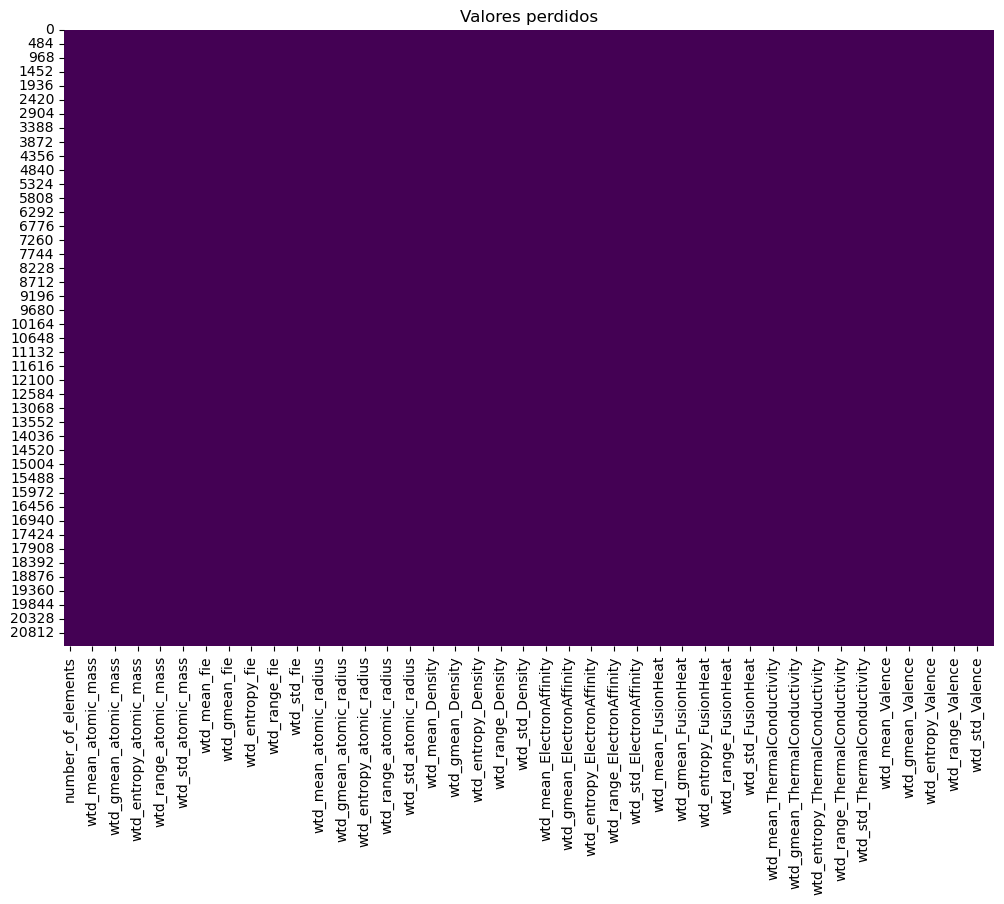

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores perdidos')
plt.show()

In [4]:
display("Entradas duplicadas", df.duplicated().sum())
display("Entradas NaN",df.isnull().sum())

'Entradas duplicadas'

66

'Entradas NaN'

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [5]:
df = df.dropna()
df = df.drop_duplicates()

In [6]:
### <span style="color:#57a989">1. Limpieza de Datos</span>display("Entradas duplicadas", df.duplicated().sum())
display("Entradas NaN",df.isnull().sum())

'Entradas NaN'

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

**Observaciones**

+ El dataset fue limpiado previamente por lo que los cambios fueron mínimos.

### <span style="color:#57a989">2. Análisis exploratorio de los datos</span>

In [7]:
display(df.head(15))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [8]:
df.shape

(21197, 82)

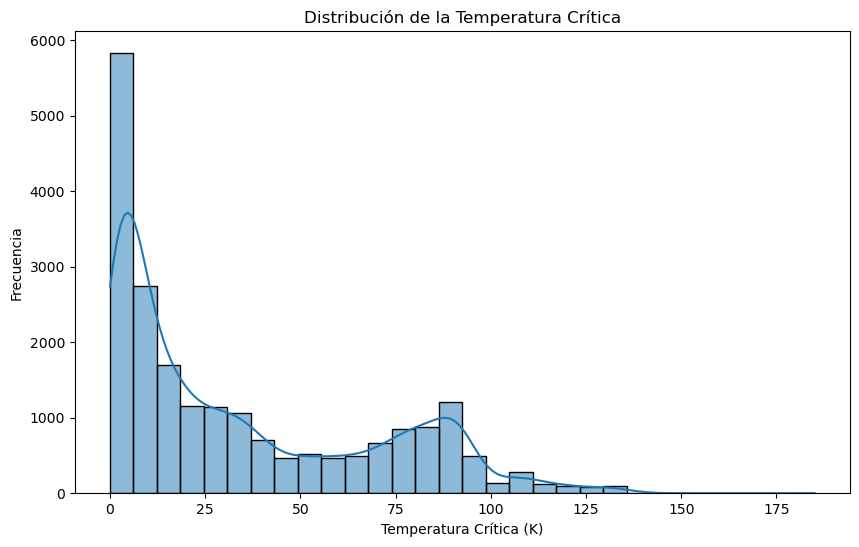

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["critical_temp"], bins=30, kde=True)  # kde=True añade una línea de densidad
plt.xlabel("Temperatura Crítica (K)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Temperatura Crítica")
plt.show()

In [10]:
correlations = df.corr(numeric_only=True)["critical_temp"].sort_values(ascending=False).drop("critical_temp")
for feature, correlation in correlations.items():
    print(f"{feature} : {correlation:.6f}")

wtd_std_ThermalConductivity : 0.720960
range_ThermalConductivity : 0.687282
range_atomic_radius : 0.653394
std_ThermalConductivity : 0.653232
wtd_entropy_atomic_mass : 0.626536
wtd_entropy_atomic_radius : 0.602986
number_of_elements : 0.600394
range_fie : 0.600179
wtd_std_atomic_radius : 0.598972
entropy_Valence : 0.598024
wtd_entropy_Valence : 0.589204
wtd_std_fie : 0.581442
entropy_fie : 0.567156
wtd_entropy_FusionHeat : 0.562808
std_atomic_radius : 0.559132
entropy_atomic_radius : 0.558249
entropy_FusionHeat : 0.552069
entropy_atomic_mass : 0.542894
std_fie : 0.541091
range_atomic_mass : 0.491642
wtd_range_ThermalConductivity : 0.469053
entropy_Density : 0.456492
entropy_ElectronAffinity : 0.436357
wtd_entropy_Density : 0.400023
wtd_mean_fie : 0.397888
wtd_entropy_fie : 0.387703
wtd_mean_ThermalConductivity : 0.379173
std_atomic_mass : 0.378519
mean_ThermalConductivity : 0.375649
wtd_std_atomic_mass : 0.358928
wtd_gmean_fie : 0.342814
wtd_std_ElectronAffinity : 0.314836
wtd_range_fi

### <span style="color:#57a989">3. Extracción y selección de características</span>

In [11]:
merged_df = pd.merge(df, df_ext, on='critical_temp')

In [12]:
display(merged_df.isnull().sum())

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Bi                       0
Po                       0
At                       0
Rn                       0
material                 0
Length: 169, dtype: int64

In [13]:
dff = merged_df.drop('material', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocesamiento de datos (igual que antes)
y_sample = dff[['critical_temp']]
X_sample = dff.drop('critical_temp', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

scaler = StandardScaler() # O StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.astype(np.float32)  # Asegurar tipo float32
X_test = X_test.astype(np.float32)
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [15]:
X_test.shape

(142797, 167)

### <span style="color:#57a989">4. Entrenamiento del modelo DNN</span>

In [16]:
import tensorflow as tf
from tensorflow import keras

2024-11-20 01:58:41.580977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 01:58:41.761566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 01:58:41.801785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 01:58:42.055815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 01:58:44.385239: W tensorflow/compiler/tf2

In [17]:
# Definir el modelo de Keras
input_size = 167
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(input_size,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1) # Sin activación para regresión
])

# Compilar el modelo
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # MSE para regresión

# Ajustar el learning rate (opcional, pero recomendado)
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0: # cada 10 épocas
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


# Entrenar el modelo
epochs = 25
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test), callbacks=[lr_callback])

/home/eber/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


2024-11-20 01:58:46.969684: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 381553584 exceeds 10% of free system memory.


17850/17850 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 196.7751 - mae: 9.4529 - val_loss: 141.0539 - val_mae: 8.4500 - learning_rate: 0.0010
Epoch 2/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 107.7086 - mae: 7.0502 - val_loss: 131.5260 - val_mae: 8.1755 - learning_rate: 0.0010
Epoch 3/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 94.0509 - mae: 6.5325 - val_loss: 97.6901 - val_mae: 6.9616 - learning_rate: 0.0010
Epoch 4/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 86.3329 - mae: 6.2169 - val_loss: 78.3845 - val_mae: 6.0863 - learning_rate: 0.0010
Epoch 5/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 81.5999 - mae: 6.0221 - val_loss: 76.1041 - val_mae: 6.1028 - learning_rate: 0.0010
Epoch 6/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - loss: 78.3466 - mae: 5.9031 - val_loss: 67.3240 - val_mae: 5.4945 - learning_rate: 0.0010
Epoch 7/25
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - loss: 75.6853 - mae: 5.7908 - val_loss: 71.6229 - val_

Mean Squared Error (MSE): 44.4234
Mean Absolute Error (MAE): 4.5255
4463/4463 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


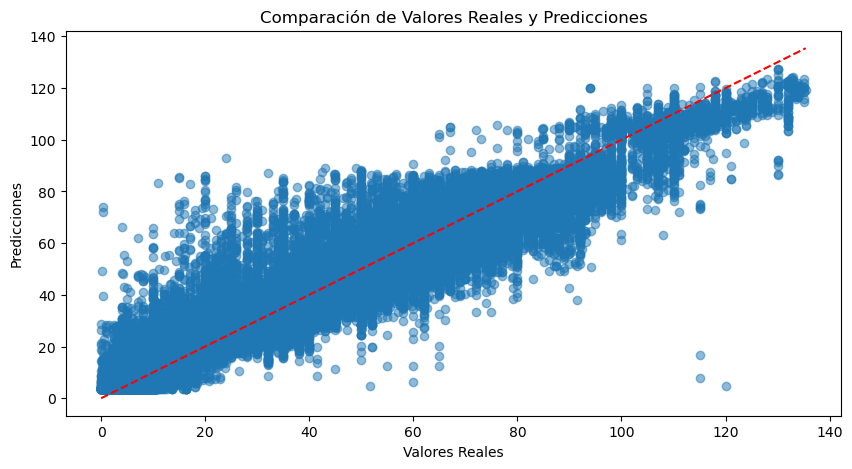

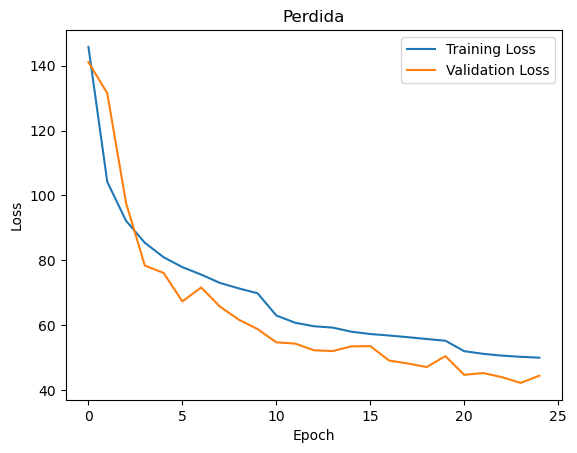

In [18]:
# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error (MSE): {loss:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


# Predicciones y gráfico
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Reales y Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


# Mostrar la pérdida y mae durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

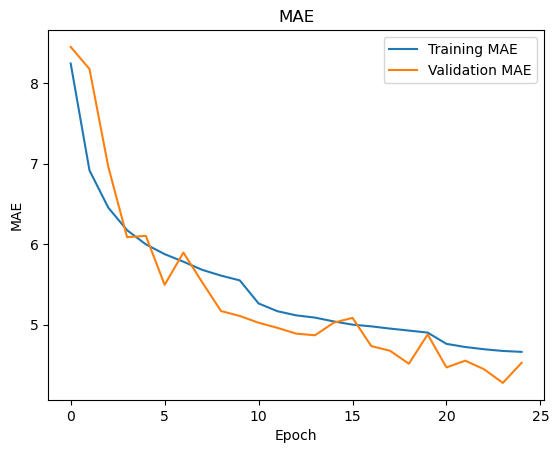

In [19]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# Obtener las predicciones del modelo
y_train_pred = model.predict(X_train)

# Calcular el coeficiente de determinación R^2
r2_train = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Imprimir todas las validaciones 
print(f"RMSE: {rmse}")
print(f"R^2 Train: {r2_train}")
print(f"R^2 Test: {r2}")

   54/17850 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step  

2024-11-20 03:22:43.141088: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 381553584 exceeds 10% of free system memory.


17850/17850 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
RMSE: 6.6650872230529785
R^2 Train: 0.9600643515586853
R^2 Test: 0.9571184515953064


In [ ]:
# Captura del modelo "atrapalos todos"
model.save("DNN-SCDestor.h5")

#Captura del modelo en carpeta para posibles mejoras
model.save("DNN-SCDestor.keras")


### <span style="color:#57a989">5. Conclusiones</span>

+ Se obtuvo un modelo de Redes Neuronales Densas capaz de clasificar con una exactitud de 95%.
+ Los modelos de recurrentes entrenados en otros trabajos habían usado solo una tabla de composición del material, es decir, se usaba una tabla que indicaba el porcentaje del elemento usado para crear el material. En este proyecto se confirmo que para una mayor exactitud al predecir temperaturas críticas es necesario combinar la tabla de composición con la extension de características del material.
+ Las Redes Neuronales Densas son muy útiles para este tipo de problemas, no solo procesa con facilidad la excesiva cantidad de columnas, si no que predice y clasifica de manera muy precisa.